# Chopsticks!

A few researchers set out to determine the optimal length of chopsticks for children and adults. They came up with a measure of how effective a pair of chopsticks performed, called the "Food Pinching Performance." The "Food Pinching Performance" was determined by counting the number of peanuts picked and placed in a cup (PPPC).

### An investigation for determining the optimum length of chopsticks.
[Link to Abstract and Paper](http://www.ncbi.nlm.nih.gov/pubmed/15676839)  
*the abstract below was adapted from the link*

Chopsticks are one of the most simple and popular hand tools ever invented by humans, but have not previously been investigated by [ergonomists](https://www.google.com/search?q=ergonomists). Two laboratory studies were conducted in this research, using a [randomised complete block design](http://dawg.utk.edu/glossary/whatis_rcbd.htm), to evaluate the effects of the length of the chopsticks on the food-serving performance of adults and children. Thirty-one male junior college students and 21 primary school pupils served as subjects for the experiment to test chopsticks lengths of 180, 210, 240, 270, 300, and 330 mm. The results showed that the food-pinching performance was significantly affected by the length of the chopsticks, and that chopsticks of about 240 and 180 mm long were optimal for adults and pupils, respectively. Based on these findings, the researchers suggested that families with children should provide both 240 and 180 mm long chopsticks. In addition, restaurants could provide 210 mm long chopsticks, considering the trade-offs between ergonomics and cost.

### For the rest of this project, answer all questions based only on the part of the experiment analyzing the thirty-one adult male college students.
Download the [data set for the adults](https://www.udacity.com/api/nodes/4576183932/supplemental_media/chopstick-effectivenesscsv/download), then answer the following questions based on the abstract and the data set.

**If you double click on this cell**, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options. You will learn more about Markdown later in the Nanodegree Program. Hit shift + enter or shift + return to show the formatted text.

#### 1. What is the independent variable in the experiment?
You can either double click on this cell to add your answer in this cell, or use the plus sign in the toolbar (Insert cell below) to add your answer in a new cell.


#### 2. What is the dependent variable in the experiment?



#### 3. How is the dependent variable operationally defined?



#### 4. Based on the description of the experiment and the data set, list at least two variables that you know were controlled.
Think about the participants who generated the data and what they have in common. You don't need to guess any variables or read the full paper to determine these variables. (For example, it seems plausible that the material of the chopsticks was held constant, but this is not stated in the abstract or data description.)



One great advantage of ipython notebooks is that you can document your data analysis using code, add comments to the code, or even add blocks of text using Markdown. These notebooks allow you to collaborate with others and share your work. For now, let's see some code for doing statistics.

In [1]:
import pandas as pd

# pandas is a software library for data manipulation and analysis
# We commonly use shorter nicknames for certain packages. Pandas is often abbreviated to pd.
# hit shift + enter to run this cell or block of code

In [2]:
path = r'~/Downloads/chopstick-effectiveness.csv'
# Change the path to the location where the chopstick-effectiveness.csv file is located on your computer.
# If you get an error when running this block of code, be sure the chopstick-effectiveness.csv is located at the path on your computer.

dataFrame = pd.read_csv(path)
dataFrame.head()

,Food.Pinching.Efficiency,Individual,Chopstick.Length
0,19.55,1,180
1,27.24,2,180
2,28.76,3,180
3,31.19,4,180
4,21.91,5,180


Let's do a basic statistical calculation on the data using code! Run the block of code below to calculate the average "Food Pinching Efficiency" for all 31 participants and all chopstick lengths.

In [3]:
dataFrame['Food.Pinching.Efficiency'].mean()

25.00559139784947

This number is helpful, but the number doesn't let us know which of the chopstick lengths performed best for the thirty-one male junior college students. Let's break down the data by chopstick length. The next block of code will generate the average "Food Pinching Effeciency" for each chopstick length. Run the block of code below.

In [4]:
meansByChopstickLength = dataFrame.groupby('Chopstick.Length')['Food.Pinching.Efficiency'].mean().reset_index()
meansByChopstickLength

# reset_index() changes Chopstick.Length from an index to column. Instead of the index being the length of the chopsticks, the index is the row numbers 0, 1, 2, 3, 4, 5.

,Chopstick.Length,Food.Pinching.Efficiency
0,180,24.935161
1,210,25.483871
2,240,26.322903
3,270,24.323871
4,300,24.968065
5,330,23.999677


#### 5. Which chopstick length performed the best for the group of thirty-one male junior college students?



Populating the interactive namespace from numpy and matplotlib


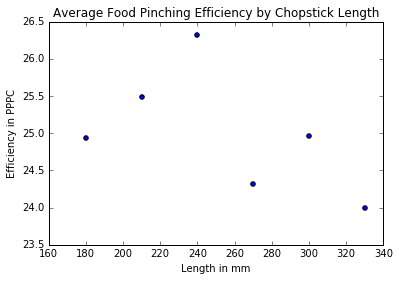

In [5]:
# Causes plots to display within the notebook rather than in a new window
%pylab inline

import matplotlib.pyplot as plt

plt.scatter(x=meansByChopstickLength['Chopstick.Length'], y=meansByChopstickLength['Food.Pinching.Efficiency'])
            # title="")
plt.xlabel("Length in mm")
plt.ylabel("Efficiency in PPPC")
plt.title("Average Food Pinching Efficiency by Chopstick Length")
plt.show()

#### 6. Based on the scatterplot created from the code above, interpret the relationship you see. What do you notice?



- The plot is misleading (very narrow Y axis range)
- PPPC increases as a function of length in mm, up to 240 mm.

### In the abstract the researchers stated that their results showed food-pinching performance was significantly affected by the length of the chopsticks, and that chopsticks of about 240 mm long were optimal for adults.

#### 7a. Based on the data you have analyzed, do you agree with the claim?

It's a bit of a mixed bag.  I do agree that performance is significantly (statstically significant, not necessarilly practically significant) affected by chopstick length, but I don't agree that 240 mm is the optimal length.  Furthermore, the change in performance as a function of chopstick length, is marginal at best.  

#### 7b. Why?

To answer the question of whether there is a statstically significant difference is effeciency/performance for adults, as a function of chopstick length, I performed a paired one-tailed t-test (see below) for the difference in efficiency of each length of chopstick (180mm, 210mm, 270mm, 300mm, and 330mm) relative to the reported optimum (240mm).

- alpha level: .05
- Null Hypothesis H0: There is no difference in the means of efficiency between chopsticks 240mm in length and that of chopsticks either 180mm, 210mm, 270mm, 300mm, or 330mm in length.

MeanEfficiency_240mmLength - MeanEfficiency_EachOtherLength = 0

- Alternative Hypothesis Ha:  There is a postitive difference in the means of efficiency between chopsticks 240mm in length and the of chopsticks of either 180mm, 210mm, 270mm, or 330mm in length.

MeanEfficiency_240mmLength - MeanEfficiency_EachOtherLength > 0


Given the p-values below, we reject the null hypothesis in favor of the alternative hypothesis for all lengths excepting 210mm.  We fail to reject the null hypothesis for 210mm.  Also note for this length, that 0 is in 95% CI.  Only a small proportion of this CI is in the range of <= 0, with the remainder > 0.  Considering this, it is possible, given enough subjects (statstical power) that we might resolve a difference between the two lengths, but even if we show a statistical signifcant differennce, the results are not likely to be practically signficant.  The mean difference between each length and 240mm is < 3 PPPC.  I'm not privy to where the line is drawn in terms of practical significance, but this seems marginal.  So, overall we can't resolve a performance difference between 210 and 240mm and for those lengths where we can resolve a difference, the difference is marginal.



### Effeciency as a function of chopstick length, hypothesis testing

Note that while I could have used scipy.stats to determine the t-statistic and p-value from the raw data, I intentionally performed the analysis step-wise for benefit of the audeince, my future self, and to reinforce learning.

In [6]:
import scipy as sp
from scipy import stats

In [7]:
# rename columns to something more convenient (easily amenable to dot notation)

dataFrame = dataFrame.rename(columns = {'Food.Pinching.Efficiency':'Efficiency', 
                            'Chopstick.Length':'Length'})

In [8]:
# drop the unused column 'Individual'

dataFrame = dataFrame.drop(['Individual'], axis = 1)

In [9]:
def diff_lengths(df, ref_length):
    
    
    '''Accepts: PANDAS DataFrame and a reference length (integer)
       Returns: Dict with lengths as key and array of efficiency
       differences from the reference length as values'''
    
    ret = {}
    lengths = df.Length.unique()
    
    for length in lengths:
        ret[str(length)] = (df[df.Length == ref_length].Efficiency.values - 
                       df[df.Length == length].Efficiency.values)      

        
    del ret[str(ref_length)]
    
    return ret   
    

In [10]:
# create a dict of performance differences for each length relative to 240mm using diff_lengths()

diff_dict = diff_lengths(dataFrame, 240)

In [11]:
# create a PANDAS DataFrame from the differences dict

df_diff = pd.DataFrame.from_dict(diff_dict)

In [12]:
# degrees of freedom = number of subjects (series length) - 1

degrees_freedom = len(dataFrame[dataFrame.Length == 180]) - 1
degrees_freedom

30

In [13]:
desc = df_diff.describe()
desc

,180,210,270,300,330
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1.387742,0.839032,1.999032,1.354839,2.323226
std,3.442612,3.175329,3.402315,3.012744,2.343952
min,-4.110000,-5.890000,-6.380000,-3.790000,-1.570000
25%,-1.125000,-1.800000,-0.325000,-0.830000,0.600000
50%,1.350000,1.540000,1.950000,1.210000,1.920000
75%,2.910000,3.450000,4.920000,3.555000,4.190000
max,9.460000,7.130000,7.160000,7.330000,7.180000


In [14]:
# arrays of pertinent stats from the descriptive statistics DataFrame

means = desc.loc['mean']
stdevs = desc.loc['std']
SEs = stdevs/sqrt(31)
t_stats = means/SEs
p_stats = sp.stats.t.sf(t_stats, 30)
MEs = 1.697 * SEs # t crtical 95% for 30 df = 1.697
CIs_lower = means - MEs
CIs_upper = means + MEs

In [15]:
# the t statistics

t_stats

180    2.244406
210    1.471197
270    3.271343
300    2.503838
330    5.518533
dtype: float64

In [16]:
# p values (order = 180mm, 210mm, 270mm, 300mm, 330mm)
p_stats

array([  1.61681621e-02,   7.58252556e-02,   1.34636443e-03,
         8.97733830e-03,   2.69476305e-06])

In [17]:
# 95% confidence interval lower bound

CIs_lower

180    0.338468
210   -0.128777
270    0.962040
300    0.436584
330    1.608812
dtype: float64

In [18]:
# 95% confidence interval upper bound

CIs_upper

180    2.437016
210    1.806841
270    3.036025
300    2.273094
330    3.037639
dtype: float64